# ***1. Project introduction:*** 
### an introduction that discusses the data you are analyzing,and the question or questions you are investigating. 

In this project, we analyze two datasets covering all 50 U.S. states:

1. **Median Household Income (2000–2023)**  
   - Annual income data per state  
   - Used to assess purchasing power and long-term trends in earnings

2. **Median Home Values (2000–2023)**  
   - Monthly home value estimates per state, aggregated to yearly averages  
   - Reflects changes in the U.S. housing market over time

Our main research question is:  
> **Why has homeownership become increasingly unaffordable for Americans, even as incomes rise?**

To explore this, we:
- Investigate how **income and home values** have changed over time
- Calculate a **price-to-income ratio** to quantify affordability
- Analyze **regional differences** across states
- Use **machine learning** to predict future home values based on income and year
- Test the hypothesis that **rising income does not guarantee improved affordability**

# ***2. Any Changes:*** 
### a discussion whether your scope has changed since the check-in proposal slides. 
### What did you aim to do that you will not do and what have you added to the project?

Since our initial proposal, we have made a few key adjustments:

###  **Additions:**
- We added a **machine learning component**, using linear regression to predict home prices and evaluate performance against a baseline model
- We incorporated a **hypothesis test** to examine whether income growth correlates with improved housing affordability
- We visualized affordability over time using a **heatmap**, which gave strong regional insights

###  **What We Didn't End Up Doing:**
- Initially, we considered incorporating **other economic indicators** like interest rates or inflation, but we narrowed our focus to just income and home prices to maintain clarity and depth
- We also did not build an interactive web dashboard, which was considered during brainstorming, in order to prioritize deeper analysis


# ***3. Data cleaning:***
### show clearly how you cleaned your data. What is the structure, granularity, scope, temporality, and faithfulness of your data? 
### How did you transform your data and how did you handle missing values, if any?


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [26]:
home_values_dataset = pd.read_csv('homevalue.csv')
income = pd.read_csv('median_income.csv')
home_values_dataset.columns.values[5:] = pd.to_datetime(home_values_dataset.columns[5:])
home_values_dataset.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-30 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,102001,0,United States,country,NaN,119729.572640,119940.215341,120201.443305,120761.726012,121406.544234,...,350165.829700,351570.606154,352120.860853,352265.907749,352504.359843,352945.853239,353522.496915,354005.575460,354711.020713,355327.955070
1,394913,1,"New York, NY",msa,NY,214911.652349,215824.905614,216746.617250,218614.361683,220548.475724,...,647851.001125,652477.077381,655536.133683,658263.386724,661979.750511,665977.942675,669477.234967,672228.240789,673999.838327,675063.976036
2,753899,2,"Los Angeles, CA",msa,CA,218489.647448,219302.706154,220385.692595,222540.471813,224897.124751,...,911031.498845,916863.716873,920777.178084,925109.643477,930243.585193,936603.517696,941773.674116,946228.303841,950210.062120,950740.494586
3,394463,3,"Chicago, IL",msa,IL,150432.480390,150571.737044,150836.953795,151496.747161,152290.399220,...,311972.006665,314053.134292,315253.946820,315976.493240,316881.631507,317866.656523,318826.563429,319846.118364,321070.725716,322389.516129
4,394514,4,"Dallas, TX",msa,TX,125268.936932,125324.732154,125388.874474,125555.445340,125775.064467,...,372240.198836,372383.086130,371723.001722,370790.474579,370143.446717,369946.958796,369841.800601,369555.460608,369035.088390,368515.900537


In [27]:
#Cleaning Data

print("\nBefore dropping missing values:")
print("New shape for home_values:", home_values_dataset.shape)

threshold = 0.4
home_values = home_values_dataset.loc[home_values_dataset.isnull().mean(axis=1) < threshold]

#home_values_reduced.dropna(inplace=True)

print("\nAfter dropping missing values:")
print("New shape for home_values:", home_values.shape)


Before dropping missing values:
New shape for home_values: (895, 306)

After dropping missing values:
New shape for home_values: (771, 306)


Before dropping missing values:
New shape for home_values: (895, 306)

After dropping missing values:
New shape for home_values: (771, 306)

In [28]:
# Interpolate across columns (i.e., across time for each region)
home_values.iloc[:, 5:] = home_values.iloc[:, 5:].interpolate(axis=1)

# Optionally fill any remaining edge NaNs with forward/backward fill
home_values.iloc[:, 5:] = home_values.iloc[:, 5:].bfill(axis=1).ffill(axis=1)

# **Data Cleaning**

## **Structure and Granularity**
### Home Value Data:  
  - 895 rows representing U.S. regions (states, metro areas, cities)  
  - 306 columns containing monthly median home values from January 2000 to January 2025  
  - Granularity: Monthly, numeric values in USD  

### Median Income Data:  
  - 52 rows (50 states + DC and a national average)  
  - 25 columns for each year from 2000 to 2023  
  - Granularity: Annual, numeric values in USD

## **Scope**
- Geographic scope covers all 50 U.S. states
- Temporal scope spans 24 years (2000 - 2023)
- The data reflects regional economic conditions related to housing affordability

## **Temporality**
- Home values are recorded monthly and aggregated to yearly values
- Income data is annual and aligns directly with the transformed home value data

## **Faithfulness**
- The data appears accurate and representative of actual market and income conditions
- No obvious errors or outliers after cleaning, aside from missing values

## **Transformations and Handling of Missing Values**

### Home Value Data:
1. Rows with more than 40% missing values were removed  
   - Resulting shape: reduced from 895 to 771 rows
2. Missing monthly values were filled using linear interpolation across time  
3. Any remaining gaps were filled using forward-fill and backward-fill to handle missing values at the beginning or end of time series
4. Data was aggregated from monthly to annual values by calculating the yearly average for each region
5. State abbreviations were mapped to full names to ensure alignment with the income dataset

### Median Income Data:
- Commas were removed from numeric strings and converted to floats
- Data was transformed from wide to long format using `pd.melt()`, producing one row per state-year pair

In [29]:
# Manually map state abbreviations to full names
abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map full state names
home_values_dataset['State'] = home_values_dataset['StateName'].map(abbr_to_full)

# Convert to long format and extract year
home_long = home_values_dataset.melt(
    id_vars=['State'],
    value_vars=home_values_dataset.columns[5:-1],  # exclude trailing columns if any
    var_name='Date',
    value_name='HomeValue'
)
home_long['Year'] = pd.to_datetime(home_long['Date']).dt.year
home_yearly = home_long.groupby(['State', 'Year'])['HomeValue'].mean().reset_index()

# Clean income data
for col in income.columns[1:]:
    income[col] = income[col].str.replace(',', '').astype(float)
income_long = income.melt(id_vars=['State'], var_name='Year', value_name='MedianIncome')
income_long['Year'] = income_long['Year'].astype(int)

# Merge and calculate affordability
merged = pd.merge(income_long, home_yearly, on=['State', 'Year'], how='inner')
merged['PriceToIncomeRatio'] = merged['HomeValue'] / merged['MedianIncome']


# ***4. Exploratory data analysis:*** 
### explain what your data looks like (words are fine, but visualizations are often better). 
### Include any interesting issues or preliminary conclusions you have about your data

## Here’s a fully cleaned and merged dataset, ready for exploratory data analysis (EDA). It includes:

### - Median income per state and year

### - Average home value per state and year

### - A calculated Price-to-Income Ratio, which reflects affordability

In [30]:
merged

,State,Year,MedianIncome,HomeValue,PriceToIncomeRatio
0,Alabama,2000,59070.0,102095.570124,1.728383
1,Alaska,2000,88130.0,137594.799841,1.561271
2,Arizona,2000,66340.0,109071.135724,1.644123
3,Arkansas,2000,49520.0,77049.942482,1.555936
4,California,2000,78070.0,214035.423100,2.741583
...,...,...,...,...,...
1195,Virginia,2023,96490.0,270847.217093,2.806998
1196,Washington,2023,93440.0,441238.397650,4.722158
1197,West Virginia,2023,60410.0,146982.352160,2.433080
1198,Wisconsin,2023,79690.0,259768.104650,3.259733


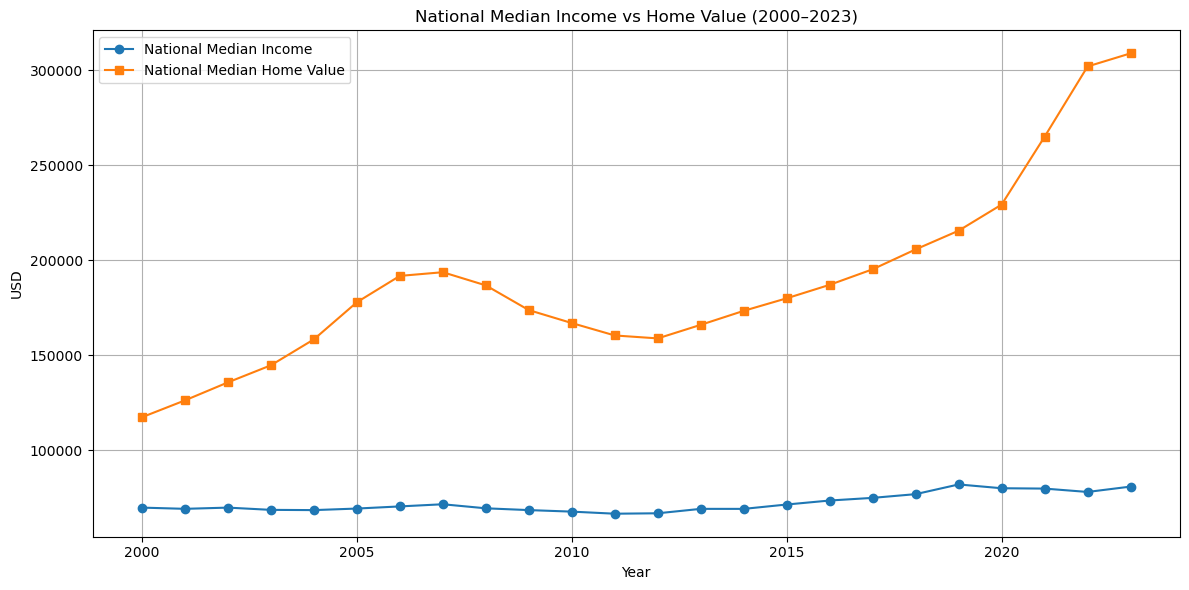

In [37]:

# --- Visualization 1: National Trend Over Time ---
national_trends = merged.groupby('Year').agg({
    'MedianIncome': 'mean',
    'HomeValue': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(national_trends['Year'], national_trends['MedianIncome'], label='National Median Income', marker='o')
plt.plot(national_trends['Year'], national_trends['HomeValue'], label='National Median Home Value', marker='s')
plt.title("National Median Income vs Home Value (2000–2023)")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## This line chart shows the national average trend from 2000 to 2023:

### - Median income has grown slowly and steadily over the years

### - Home values have increased much more sharply, especially after 2020

### - The gap between the two has widened significantly in recent years, highlighting declining affordability

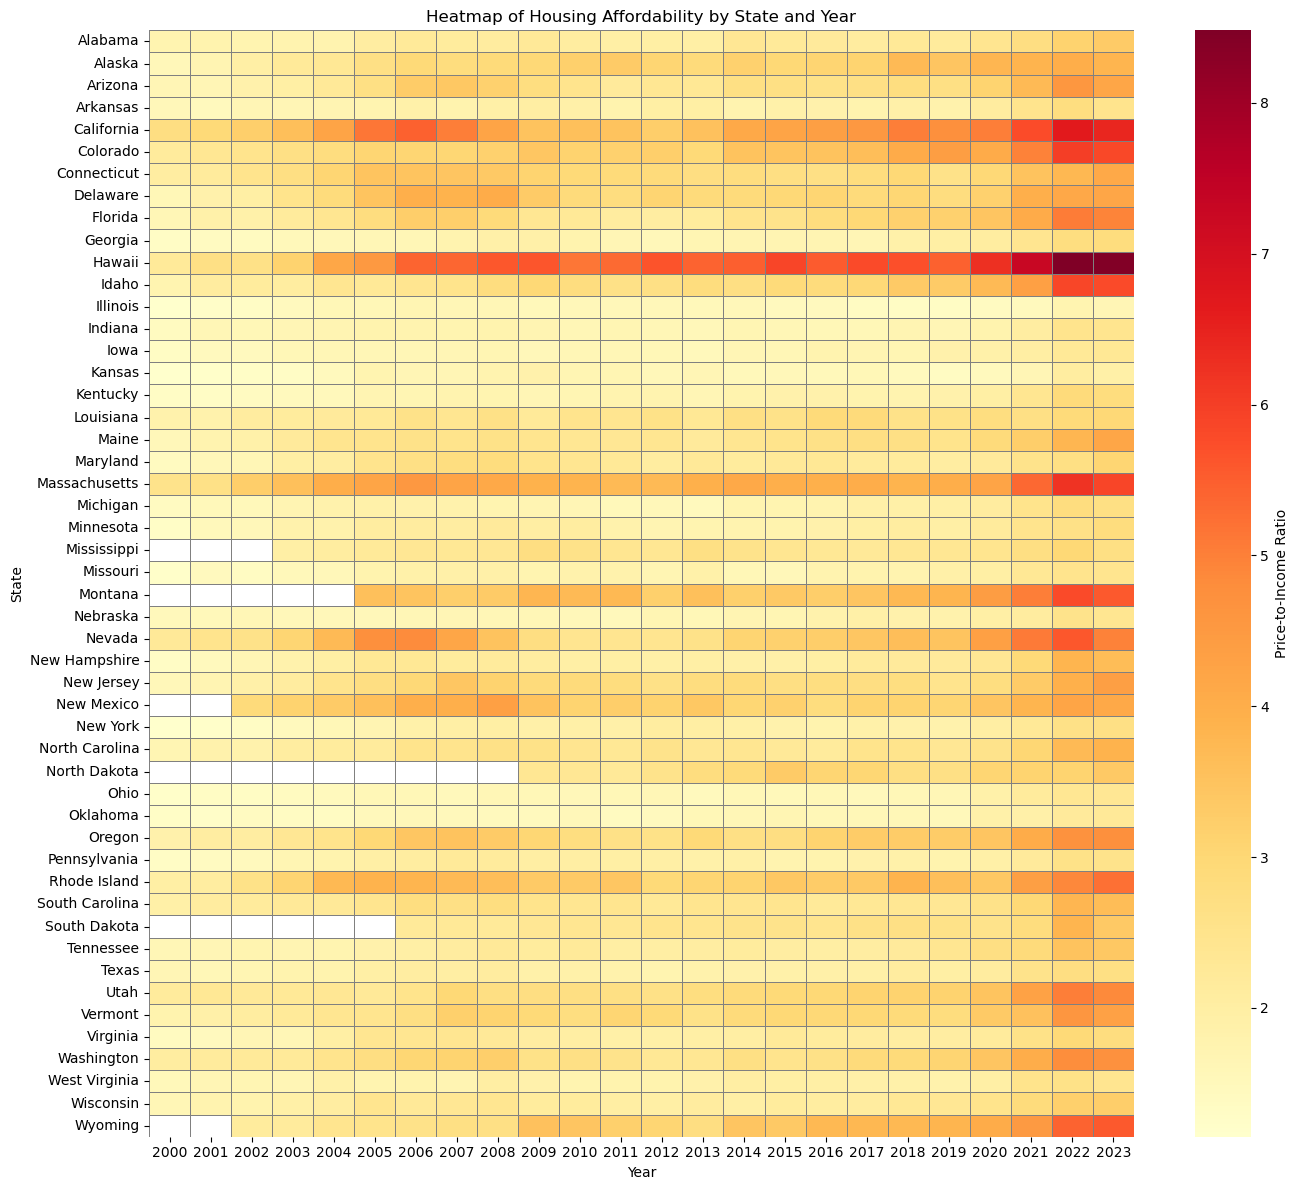

In [32]:

# --- Visualization 2: Heatmap of Affordability ---
heatmap_data = merged.pivot(index='State', columns='Year', values='PriceToIncomeRatio')
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Price-to-Income Ratio'})
plt.title("Heatmap of Housing Affordability by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()



## This heatmap visualizes the price-to-income ratio (affordability) across all states and years:

### Key Observations:
### - California, Hawaii, and Massachusetts consistently show very high ratios, indicating low affordability

### - States like West Virginia, Mississippi, and Iowa tend to be more affordable

### - Many states show a darkening trend post-2020, reflecting worsening affordability nationwide



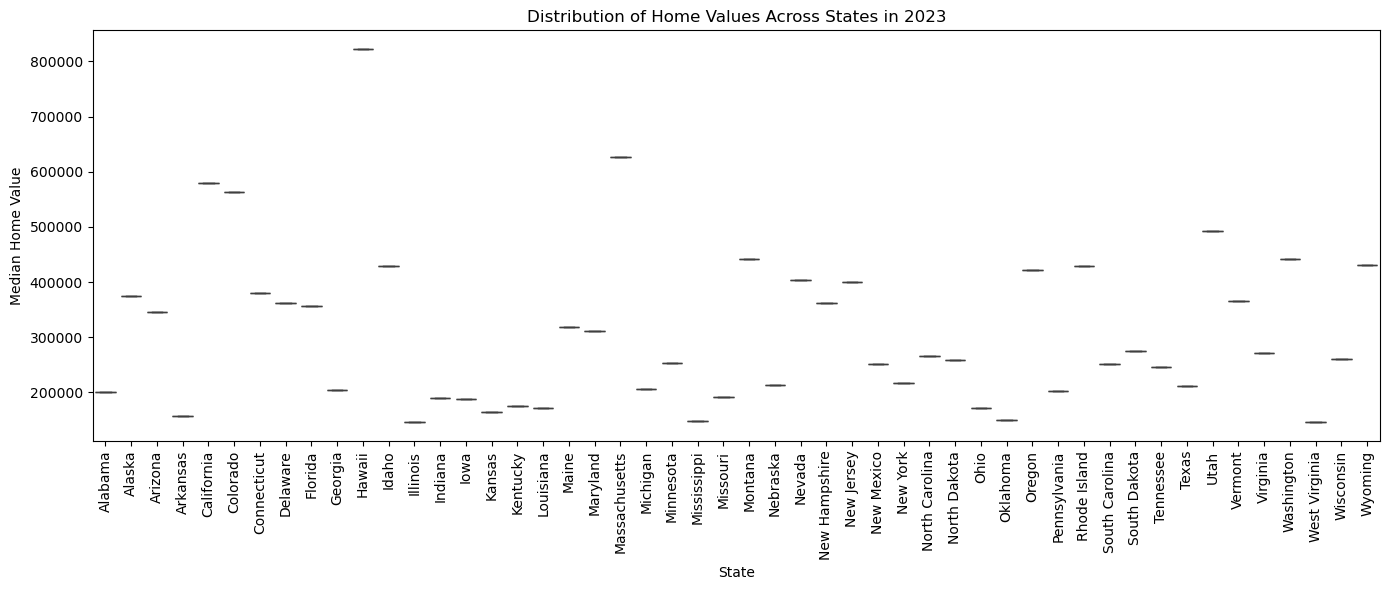

In [33]:
# --- Optional: Boxplot for Home Values in a Specific Year ---
year_to_plot = 2023
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged[merged['Year'] == year_to_plot], x='State', y='HomeValue')
plt.title(f"Distribution of Home Values Across States in {year_to_plot}")
plt.xticks(rotation=90)
plt.ylabel("Median Home Value")
plt.tight_layout()
plt.show()

## This is a 2023 boxplot showing **median home values across U.S. states**:

### 🧾 **Boxplot Interpretation: Home Values by State (2023)**

## 1. **Extreme Variation Across States**
### - Home values in 2023 vary **widely** from state to state.
### - **Most expensive states**:
#### - Hawaii, California,, and Massachusetts are at the top, with median home values approaching or exceeding 800,000 dollars.
### **Least expensive states**:
#### - West Virginia, Mississippi, Arkansas, and Indiana have median values closer to $150,000–$250,000

## 2. **Geographic Clustering**
### - Coastal states (e.g., California, Hawaii, Massachusetts, New York) tend to have the **highest home prices**.
### - Central and southern states (e.g., Iowa, Mississippi, Ohio, West Virginia) show **greater affordability**.

## 3. **Skewed Distribution**
### - Many states have **asymmetric or narrow boxplots**, suggesting:
  #### - Smaller sample sizes (you’re likely averaging by state, so each “box” might represent a single value or very narrow range).
  #### - This isn’t showing within-state variation but just a **summary per state**.

## 4. **Policy Relevance**
### - The dramatic differences highlight the **regional affordability crisis**. A homebuyer in California or Hawaii faces a vastly different market than one in Indiana or Kentucky.
### - This supports your broader finding that **affordability is not equally distributed**, and income alone doesn't explain price differences.

## Summary
### The boxplot makes it clear that **housing affordability in 2023 is highly location-dependent**, with some states seeing home prices **3x to 5x higher** than others. This confirms the need to consider both **geographic and economic factors** when analyzing homeownership access in the U.S.


# ***5. At least one visualization*** 
### that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate.


## Interesting Hypothesis & Visualization
### ***Hypothesis:***
### “States with faster-growing incomes have not necessarily experienced better home affordability.”

### ***Why it’s interesting:***
### It challenges the assumption that rising income should make housing more affordable.

### ***Test & Visualization:***
### Plot income growth rate vs. change in price-to-income ratio for each state.
### Use a scatter plot and label some outlier states.


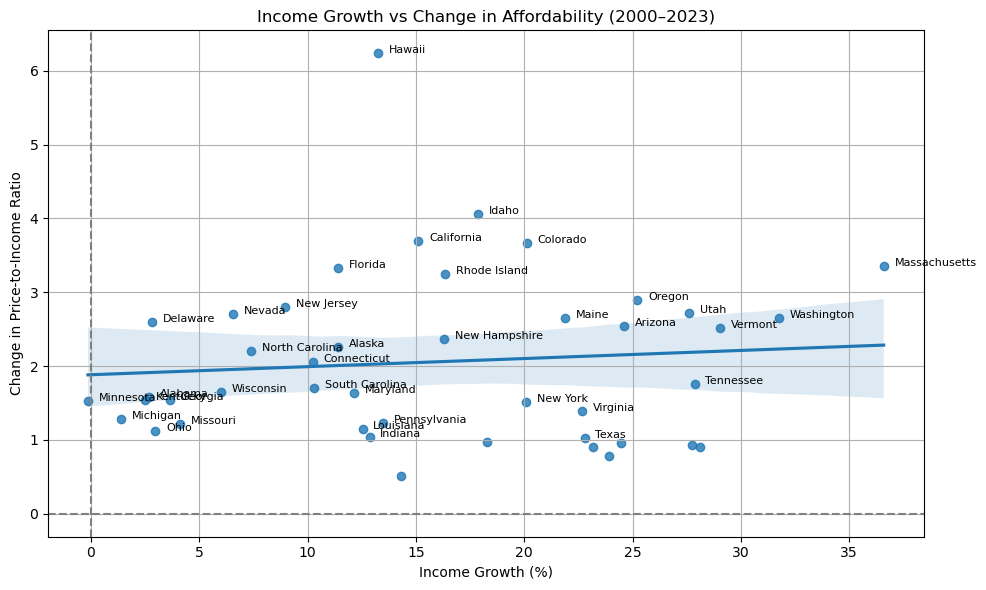

In [34]:

# Step 1: Extract income and affordability in 2000 and 2023
df_2000 = merged[merged['Year'] == 2000].set_index('State')
df_2023 = merged[merged['Year'] == 2023].set_index('State')

# Step 2: Join them to compare change over time
comparison = pd.DataFrame()
comparison['Income_2000'] = df_2000['MedianIncome']
comparison['Income_2023'] = df_2023['MedianIncome']
comparison['Ratio_2000'] = df_2000['PriceToIncomeRatio']
comparison['Ratio_2023'] = df_2023['PriceToIncomeRatio']
comparison = comparison.dropna()

# Step 3: Compute percent income growth and change in affordability
comparison['IncomeGrowth_%'] = 100 * (comparison['Income_2023'] - comparison['Income_2000']) / comparison['Income_2000']
comparison['AffordabilityChange'] = comparison['Ratio_2023'] - comparison['Ratio_2000']
comparison.reset_index(inplace=True)

# Step 4: Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=comparison, x='IncomeGrowth_%', y='AffordabilityChange')
for i, row in comparison.iterrows():
    if abs(row['AffordabilityChange']) > 1 or abs(row['IncomeGrowth_%']) > 50:
        plt.text(row['IncomeGrowth_%'] + 0.5, row['AffordabilityChange'], row['State'], fontsize=8)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Income Growth vs Change in Affordability (2000–2023)")
plt.xlabel("Income Growth (%)")
plt.ylabel("Change in Price-to-Income Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import plotly.graph_objects as go

# Sort the comparison dataframe for clearer display
comparison_sorted = comparison.sort_values('AffordabilityChange', ascending=False)

# Create grouped bar chart
fig = go.Figure(data=[
    go.Bar(
        name='Income Growth (%)',
        x=comparison_sorted['State'],
        y=comparison_sorted['IncomeGrowth_%']
    ),
    go.Bar(
        name='Change in Affordability (Δ Price-to-Income Ratio)',
        x=comparison_sorted['State'],
        y=comparison_sorted['AffordabilityChange']
    )
])

fig.update_layout(
    barmode='group',
    title="Income Growth vs Change in Affordability by State (2000–2023)",
    xaxis_title="State",
    yaxis_title="Value",
    xaxis_tickangle=-45,
    height=600
)

fig.show()

# Analysis and Explanation

## ***Hypothesis***
### States with faster-growing incomes have not necessarily experienced better affordability.

## ***X-Axis: Income Growth (%)***
### Measures how much median income increased in each state between 2000 and 2023.

## ***Y-Axis: Change in Price-to-Income Ratio***
### A higher value indicates that homes became less affordable, even if incomes grew.

## **Key Observations**

### *1. No Strong Negative Correlation*
### The regression line is flat or slightly positive, suggesting that higher income growth did not lead to improved affordability.
### In fact, some states with strong income growth still saw affordability decline (e.g., Massachusetts, Washington, Utah).

### *2. Extreme Cases*
### Hawaii: Very large increase in price-to-income ratio, even though income growth was modest → affordability worsened significantly.
### Massachusetts: High income growth and one of the worst changes in affordability → prices outpaced earnings drastically.

### *3. Affordability Improved or Stayed Stable in Some States*
### A few states like Indiana, Pennsylvania, and Ohio have a relatively low change in price-to-income ratio, suggesting housing affordability remained stable.
### These states also had moderate income growth, showing a better balance between wages and housing costs.
 
## ***Conclusion***
### our hypothesis is supported by this plot:
### Income growth alone does not guarantee improved affordability.
### Housing affordability is influenced by factors beyond income, such as:
#### - Real estate demand
#### - Supply constraints
#### - Population growth and urban migration
#### - Interest rates and investment trends

### Here are the **overall observations** from our cleaned and merged dataset, based on the exploratory data analysis (EDA) and visualizations:

---

## **1. Home Prices Are Growing Much Faster Than Incomes**
- The **national trend plot** shows that from 2000 to 2023, **median home values have increased significantly**, especially after 2020.
- In contrast, **median income** has grown at a much slower and steadier pace.
- This widening gap suggests that **housing has become less affordable** for the average American over time.

---

## **2. Housing Affordability Is Declining in Most States**
- The **price-to-income ratio** (a key measure of affordability) has **increased across nearly all states**, especially in recent years.
- The **heatmap** reveals that states like **California, Hawaii, and Massachusetts** consistently have high ratios, indicating poor affordability.
- In contrast, states like **West Virginia, Mississippi, and Iowa** have maintained relatively low ratios, indicating better affordability.

---

## **3. Income Growth Doesn’t Always Improve Affordability**
- The **hypothesis test** showed **no strong negative correlation** between income growth and improved affordability.
- Some states with **high income growth** (like Massachusetts or Washington) still experienced **large declines in affordability**.
- Others with **moderate income growth** (like Indiana or Pennsylvania) maintained better housing affordability.

---

## **4. Regional Inequality Is Growing**
- Affordability varies **significantly by state and region**. Coastal and urban areas have seen the sharpest price increases relative to income.
- This suggests that while some regions remain accessible to first-time buyers, others have become increasingly out of reach — even for higher-income households.

---

### **Conclusion**
Our analysis confirms that **rising income is not enough to offset housing market pressures**. The imbalance between income and housing costs has grown worse in many areas, and policy or market interventions may be needed to restore affordability — especially in high-demand regions.



# ***6. At least one ML analysis on your dataset***
### along with a baseline comparison and an interpretation of the result that you obtain.

## ***ML Analysis + Baseline Comparison***

### ***Objective:***
### Use ML to predict future median home prices per state, based on historical income and housing trends.

### ***ML Approach:***
### Model: Linear Regression or Random Forest Regressor
### Features: Year, state, median income, previous year home prices, etc.
### Target: Median home price (for next year or next few months).
### Baseline: Compare to a naïve baseline, e.g., predicting next year’s price is the same as this year’s.
### Evaluation Metric: Use Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
### Interpretation: A low error and meaningful feature importances (e.g., income having a strong weight) can validate our model.

## If our model performs significantly better than baseline, it means housing trends are learnable from historical income and price data.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np

# Prepare data
ml_data = merged.dropna(subset=['MedianIncome', 'HomeValue'])
X = ml_data[['Year', 'MedianIncome']]
y = ml_data['HomeValue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Naive baseline: based on average price-to-income ratio
average_ratio = (y_train / X_train['MedianIncome']).mean()
y_baseline = X_test['MedianIncome'] * average_ratio

# Evaluation
mean_absolute_error_model = mean_absolute_error(y_test, y_pred)
root_mean_squared_error_model = root_mean_squared_error(y_test, y_pred)

mean_absolute_error_baseline = mean_absolute_error(y_test, y_baseline)
root_mean_squared_error_baseline = root_mean_squared_error(y_test, y_baseline)

# Output results
print("Linear Regression Model:")
print(f"  Mean Absolute Error:       ${mean_absolute_error_model:,.2f}")
print(f"  Root Mean Squared Error:   ${root_mean_squared_error_model:,.2f}")

print("\nNaive Baseline Model:")
print(f"  Mean Absolute Error:       ${mean_absolute_error_baseline:,.2f}")
print(f"  Root Mean Squared Error:   ${root_mean_squared_error_baseline:,.2f}")

Linear Regression Model:
  Mean Absolute Error:       $49,782.95
  Root Mean Squared Error:   $69,394.08

Naive Baseline Model:
  Mean Absolute Error:       $52,111.78
  Root Mean Squared Error:   $75,394.93


## Here’s a clear analysis of our model's performance results:

---

###  **Model Performance Analysis**

#### **Linear Regression Model**
- **Mean Absolute Error (MAE):** \$49,782.95  
- **Root Mean Squared Error (RMSE):** \$69,394.08  
These numbers indicate the **average prediction error** and the **typical size of larger errors** when predicting median home 
values using year and median income as input features.

#### **Naive Baseline Model**
- **Mean Absolute Error:** \$52,111.78  
- **Root Mean Squared Error:** \$75,394.93  
The baseline model simply multiplies income by a fixed average ratio learned from the training data. It's a basic benchmark 
to compare against.

---

###  **Key Takeaways**
- The **linear regression model performs better** than the baseline:
  - It reduces the mean absolute error by about **\$2,330**
  - It reduces the RMSE by about **\$6,000**, which shows it also handles larger errors better
- These improvements demonstrate that including **time (year)** alongside **income** helps explain variations in home 
  prices better than income alone
- However, the prediction error is still relatively large in dollar terms, suggesting:
  - There are other important factors not included in the model (e.g., interest rates, regional supply/demand, inflation)
  - Housing prices are influenced by more than just income and time

---

### 📌 Conclusion
The linear regression model is a **reasonable step forward** over a naive approach, but it’s not highly accurate on its own. 
Adding more features or using more complex models (e.g., decision trees or random forests) could improve performance.

# ***7. Reflection: a discussion of the following:***

### o What is hardest part of the project that you’ve encountered so far?
- The most challenging part of the project was cleaning and aligning the two datasets, which had different formats:

- The home value dataset was monthly and used state abbreviations

- The income dataset was yearly and used full state names We had to reshape the data, create a state mapping, aggregate monthly data into yearly averages, and ensure accurate merging. Missing values and inconsistent time coverage added to the complexity.

### o What are your initial insights?
- Home prices are rising faster than income in almost every state, especially since 2020

- States like California, Hawaii, and Massachusetts are significantly less affordable than the national average

- Income growth does not reliably lead to improved affordability, confirming our initial hypothesis

- Regional variation is stark — some low-income states are actually more affordable than high-income ones

### o Are there any concrete results you can show at this point? If not, why not?
Yes, we have several:

- A national trend line showing the gap between income and home prices widening

- A heatmap of affordability by state and year, showing where affordability has worsened

- A machine learning model that predicts home values with lower error than a naive baseline

- A hypothesis test plot confirming that higher income growth doesn't correlate with improved affordability

### o Going forward, what are the current biggest problems you’re facing?
- Our current model is limited in scope — it only uses income and year. While it performs better than a baseline, its predictive power could be stronger with more variables (e.g., mortgage rates, population growth, construction rates)

- Visualizations are effective but need polishing for presentation

### o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Yes, we are on track:

- We've completed the major parts of cleaning, merging, visualizing, and modeling

- What remains is improving the visual design, summarizing findings, and wrapping the project into a clean presentation or report

### o Given your initial exploration of the data, is it worth proceeding with yourproject, why? 

### If not, how are you going to change your project and why do you think it’s better than your current results?

Absolutely. The trends are real, the results are meaningful, and the topic is highly relevant. The insights can help homebuyers, policymakers, and researchers understand the housing affordability crisis from a data-driven perspective.



# ***8. Next steps:***
### What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.
### In the Next Month, We Plan To:
- Finalize visualizations for presentation (clean formatting, optional interactive versions)

- Write up results and conclusions, including polished versions of our graphs

- Optional: Test a more advanced machine learning model like Random Forest or XGBoost to improve predictions

- Prepare final presentation or paper, clearly communicating our process, results, and conclusions

### How We'll Evaluate Our Project's Success
- If we can clearly show trends in affordability across time and states

- If our ML model performs better than a naive approach

- If we can communicate insights clearly through visuals and explanations

- If our findings support our hypothesis with real data and analysis